# **Introduction/Business Problem**

Food is a feeling. You eat when you’re hungry, sad, nostalgic, bored, in love, out of love and obviously when it is meal time. It soothes and it satiates. Indians take their food very seriously and the food industry is a major contributor to the economy of India.

In this project, I will be creating clusters of restaurant types in New Delhi which are not from our country (Indian food restaurants). Creating such clusters will benefit entrepreneurs and companies  who wish to open their new restaurants in the region. This can also be used to classify what type of food type is popular in a given region. More number of restaurant types in an area suggest the popularity of the food in that area. In this clustering, I am removing Indian food as I wish to see the Non Indian food type restaurants which are popular in New Delhi.


### Importing libraries required

In [0]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim
import folium 
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np


### Data about New Delhi


Now we need data about New Delhi. We know that New Delhi is divided into districts which are further divided into tehsils. Link - https://simple.wikipedia.org/wiki/List_of_districts_in_Delhi

So we will extract and create a list of all the sub divisions in New Delhi

In [71]:
url = "https://simple.wikipedia.org/wiki/List_of_districts_in_Delhi"
a = requests.get(url)
a

<Response [200]>

In [72]:
df = pd.read_html(a.text)
df

[    Sl.No.          District      Headquarter Sub divisions (Tehsils)  \
 0        1         New Delhi  Connaught Place            Chanakyapuri   
 1        2  North West Delhi           Narela           Model Town[3]   
 2        3       North Delhi       Kanjhawala                  Rohini   
 3        4        West Delhi   Rajouri Garden             Patel Nagar   
 4        5  South West Delhi           Dwarka                  Dwarka   
 5        6       South Delhi            Saket                   Saket   
 6        7  South East Delhi   Defence Colony          Defence Colony   
 7        8     Central Delhi        Daryaganj                 Kotwali   
 8        9  North East Delhi        Seelampur               Seelampur   
 9       10          Shahdara         Shahdara                Shahdara   
 10      11        East Delhi      Preet Vihar            Gandhi Nagar   
 
    Sub divisions (Tehsils).1 Sub divisions (Tehsils).2  
 0           Delhi Cantonment              Vasant Vi

Now we have the data from wikipedia page. Now we will clean this data 

In [73]:
df_tehsils = df[0] 
df_tehsils

,Sl.No.,District,Headquarter,Sub divisions (Tehsils),Sub divisions (Tehsils).1,Sub divisions (Tehsils).2
0,1,New Delhi,Connaught Place,Chanakyapuri,Delhi Cantonment,Vasant Vihar
1,2,North West Delhi,Narela,Model Town[3],Narela,Alipur
2,3,North Delhi,Kanjhawala,Rohini,Kanjhawala,Saraswati Vihar
3,4,West Delhi,Rajouri Garden,Patel Nagar,Punjabi Bagh,Rajouri Garden
4,5,South West Delhi,Dwarka,Dwarka,Najafgarh,Kapashera
5,6,South Delhi,Saket,Saket,Hauz Khas,Mehrauli
6,7,South East Delhi,Defence Colony,Defence Colony,Kalkaji,Sarita Vihar
7,8,Central Delhi,Daryaganj,Kotwali,Civil Lines,Karol Bagh
8,9,North East Delhi,Seelampur,Seelampur,Yamuna Vihar,Karawal Nagar
9,10,Shahdara,Shahdara,Shahdara,Seemapuri,Vivek Vihar


We will combine the last three columns in the given table

In [74]:
x = df_tehsils["Sub divisions (Tehsils)"].append(df_tehsils["Sub divisions (Tehsils).1"]).append(df_tehsils["Sub divisions (Tehsils).2"]).reset_index(drop=True)
x

0         Chanakyapuri
1        Model Town[3]
2               Rohini
3          Patel Nagar
4               Dwarka
5                Saket
6       Defence Colony
7              Kotwali
8            Seelampur
9             Shahdara
10        Gandhi Nagar
11    Delhi Cantonment
12              Narela
13          Kanjhawala
14        Punjabi Bagh
15           Najafgarh
16           Hauz Khas
17             Kalkaji
18         Civil Lines
19        Yamuna Vihar
20           Seemapuri
21         Preet Vihar
22        Vasant Vihar
23              Alipur
24     Saraswati Vihar
25      Rajouri Garden
26           Kapashera
27            Mehrauli
28        Sarita Vihar
29          Karol Bagh
30       Karawal Nagar
31         Vivek Vihar
32         Mayur Vihar
dtype: object

### Getting Latitude and Longitude of these tehsils

We will use the Geopy library to get the latitude and longitude. In this library, we provide address and function returns the lat and long. I will append "New Delhi" at the end of addresses as there are other places in India with the same name.

In [75]:
for i in range(len(x)):
  x[i] = x[i] + " New Delhi"
x

0         Chanakyapuri New Delhi
1        Model Town[3] New Delhi
2               Rohini New Delhi
3          Patel Nagar New Delhi
4               Dwarka New Delhi
5                Saket New Delhi
6       Defence Colony New Delhi
7              Kotwali New Delhi
8            Seelampur New Delhi
9             Shahdara New Delhi
10        Gandhi Nagar New Delhi
11    Delhi Cantonment New Delhi
12              Narela New Delhi
13          Kanjhawala New Delhi
14        Punjabi Bagh New Delhi
15           Najafgarh New Delhi
16           Hauz Khas New Delhi
17             Kalkaji New Delhi
18         Civil Lines New Delhi
19        Yamuna Vihar New Delhi
20           Seemapuri New Delhi
21         Preet Vihar New Delhi
22        Vasant Vihar New Delhi
23              Alipur New Delhi
24     Saraswati Vihar New Delhi
25      Rajouri Garden New Delhi
26           Kapashera New Delhi
27            Mehrauli New Delhi
28        Sarita Vihar New Delhi
29          Karol Bagh New Delhi
30       K

Removing Model Town from the list as during the testing the library was not able to find the correct latitude and longitude.

In [76]:
del x[1]
x

0         Chanakyapuri New Delhi
2               Rohini New Delhi
3          Patel Nagar New Delhi
4               Dwarka New Delhi
5                Saket New Delhi
6       Defence Colony New Delhi
7              Kotwali New Delhi
8            Seelampur New Delhi
9             Shahdara New Delhi
10        Gandhi Nagar New Delhi
11    Delhi Cantonment New Delhi
12              Narela New Delhi
13          Kanjhawala New Delhi
14        Punjabi Bagh New Delhi
15           Najafgarh New Delhi
16           Hauz Khas New Delhi
17             Kalkaji New Delhi
18         Civil Lines New Delhi
19        Yamuna Vihar New Delhi
20           Seemapuri New Delhi
21         Preet Vihar New Delhi
22        Vasant Vihar New Delhi
23              Alipur New Delhi
24     Saraswati Vihar New Delhi
25      Rajouri Garden New Delhi
26           Kapashera New Delhi
27            Mehrauli New Delhi
28        Sarita Vihar New Delhi
29          Karol Bagh New Delhi
30       Karawal Nagar New Delhi
31        

Creating a pandas dataframe

In [77]:
add = pd.DataFrame({"Neighborhood" : x})
add = add.reset_index(drop = True)
add

,Neighborhood
0,Chanakyapuri New Delhi
1,Rohini New Delhi
2,Patel Nagar New Delhi
3,Dwarka New Delhi
4,Saket New Delhi
5,Defence Colony New Delhi
6,Kotwali New Delhi
7,Seelampur New Delhi
8,Shahdara New Delhi
9,Gandhi Nagar New Delhi


### Getting Latitude and Longitude of Tehsils

In [78]:
address = add["Neighborhood"]
geolocator = Nominatim(user_agent="ny_explorer", timeout=3)

lat = []
lon = []
for addr in address:
  location = geolocator.geocode(addr)
  print(location.latitude, location.longitude)
  lat.append(location.latitude)
  lon.append(location.longitude)
print(lat, lon)

28.5946775 77.1885212
28.7162092 77.1170743
28.6598088 77.156957
28.574272 77.0653316
28.5244107 77.2137253
28.5712216 77.23177637002767
28.6419258 77.2217499
28.6698165 77.2668137
28.6733333 77.2890248
39.0317139 -90.2612233
28.593833099999998 77.13497891459929
28.8426096 77.0918354
28.7358173 77.0043151
28.668945 77.1324614
28.612304 76.9823908
28.5442564 77.2067072
39.0317139 -90.2612233
28.6768508 77.2250299
28.700372 77.2727728
28.6853537 77.3255208
28.6414409 77.2952594
28.56069055 77.16079073168567
28.7959955 77.1360706
28.4772236 77.0832762
28.6421518 77.11606037769263
28.5231419 77.08776554729158
28.5218262 77.1783232
28.5285737 77.2883311
28.6529982 77.1890227
28.7311406 77.2747898
28.6691641 77.31226695421603
28.6131071 77.2957221
[28.5946775, 28.7162092, 28.6598088, 28.574272, 28.5244107, 28.5712216, 28.6419258, 28.6698165, 28.6733333, 39.0317139, 28.593833099999998, 28.8426096, 28.7358173, 28.668945, 28.612304, 28.5442564, 39.0317139, 28.6768508, 28.700372, 28.6853537, 28.

In [79]:
lat_lo = pd.DataFrame({'Latitude' : lat, 'Longitude' : lon})
lat_lo

,Latitude,Longitude
0,28.594677,77.188521
1,28.716209,77.117074
2,28.659809,77.156957
3,28.574272,77.065332
4,28.524411,77.213725
5,28.571222,77.231776
6,28.641926,77.221750
7,28.669816,77.266814
8,28.673333,77.289025
9,39.031714,-90.261223


Combining two dataframes

In [80]:
df_teh = pd.concat([add, lat_lo], axis = 1)
print(df_teh)

                  Neighborhood   Latitude  Longitude
0       Chanakyapuri New Delhi  28.594677  77.188521
1             Rohini New Delhi  28.716209  77.117074
2        Patel Nagar New Delhi  28.659809  77.156957
3             Dwarka New Delhi  28.574272  77.065332
4              Saket New Delhi  28.524411  77.213725
5     Defence Colony New Delhi  28.571222  77.231776
6            Kotwali New Delhi  28.641926  77.221750
7          Seelampur New Delhi  28.669816  77.266814
8           Shahdara New Delhi  28.673333  77.289025
9       Gandhi Nagar New Delhi  39.031714 -90.261223
10  Delhi Cantonment New Delhi  28.593833  77.134979
11            Narela New Delhi  28.842610  77.091835
12        Kanjhawala New Delhi  28.735817  77.004315
13      Punjabi Bagh New Delhi  28.668945  77.132461
14         Najafgarh New Delhi  28.612304  76.982391
15         Hauz Khas New Delhi  28.544256  77.206707
16           Kalkaji New Delhi  39.031714 -90.261223
17       Civil Lines New Delhi  28.676851  77.

### Visualising These points on map

We see two incorrect data in the dataframe. Since the dataset is small I am manually correcting them.

Correct Values
9  28.6600 77.2626 
16 28.5400, 77.2592

In [81]:
df_teh["Latitude"].iloc[9] =  28.6600
df_teh["Longitude"].iloc[9] =  77.2626
df_teh["Latitude"].iloc[16] =  28.54
df_teh["Longitude"].iloc[16] =  77.2592
df_teh

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Neighborhood,Latitude,Longitude
0,Chanakyapuri New Delhi,28.594677,77.188521
1,Rohini New Delhi,28.716209,77.117074
2,Patel Nagar New Delhi,28.659809,77.156957
3,Dwarka New Delhi,28.574272,77.065332
4,Saket New Delhi,28.524411,77.213725
5,Defence Colony New Delhi,28.571222,77.231776
6,Kotwali New Delhi,28.641926,77.221750
7,Seelampur New Delhi,28.669816,77.266814
8,Shahdara New Delhi,28.673333,77.289025
9,Gandhi Nagar New Delhi,28.660000,77.262600


In [82]:
map_delhi = folium.Map([28.63, 77.22], zoom_start = 12)

for lat, lng, neighborhood in zip(df_teh["Latitude"], df_teh["Longitude"], df_teh["Neighborhood"]):
  label = "{}".format(neighborhood)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius = 5,
      popup = label,
      color='green',
      fill=True,
      fill_color='#3146cc',
      fill_opacity=0.7,
      parse_html=False).add_to(map_delhi)

      
map_delhi

### Using Foursqaure API to get nearby venues 

Creating variables containg api client_id, client_secret and api_version

In [0]:
CLIENT_ID = 
CLIENT_SECRET = 
VERSION = '20180605'

#### Function to get nearby areas. 

Note: radius can be changed to get better results

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Applying Function


In [85]:
delhi_teh_venues = getNearbyVenues(names = df_teh["Neighborhood"], 
                                 latitudes = df_teh["Latitude"],
                                 longitudes = df_teh["Longitude"],
                                )
print(delhi_teh_venues.shape)
print(delhi_teh_venues.head())

Chanakyapuri New Delhi
Rohini New Delhi
Patel Nagar New Delhi
Dwarka New Delhi
Saket New Delhi
Defence Colony New Delhi
Kotwali New Delhi
Seelampur New Delhi
Shahdara New Delhi
Gandhi Nagar New Delhi
Delhi Cantonment New Delhi
Narela New Delhi
Kanjhawala New Delhi
Punjabi Bagh New Delhi
Najafgarh New Delhi
Hauz Khas New Delhi
Kalkaji New Delhi
Civil Lines New Delhi
Yamuna Vihar New Delhi
Seemapuri New Delhi
Preet Vihar New Delhi
Vasant Vihar New Delhi
Alipur New Delhi
Saraswati Vihar New Delhi
Rajouri Garden New Delhi
Kapashera New Delhi
Mehrauli New Delhi
Sarita Vihar New Delhi
Karol Bagh New Delhi
Karawal Nagar New Delhi
Vivek Vihar New Delhi
Mayur Vihar New Delhi
(1148, 7)
             Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Chanakyapuri New Delhi              28.594677               77.188521   
1  Chanakyapuri New Delhi              28.594677               77.188521   
2  Chanakyapuri New Delhi              28.594677               77.188521   
3  Chanakya

### Exploratory Analysis On the Data

Columns of dataframe

In [0]:
pd.set_option('display.max_columns', None)

In [87]:
delhi_teh_venues.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [88]:
delhi_teh_venues.sample(n = 5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
483,Punjabi Bagh New Delhi,28.668945,77.132461,Dunkin',28.666258,77.126289,Donut Shop
875,Saraswati Vihar New Delhi,28.477224,77.083276,Binge Bakery,28.471200,77.102062,Bakery
1062,Sarita Vihar New Delhi,28.528574,77.288331,Pind Balluchi,28.521593,77.294188,Indian Restaurant
992,Rajouri Garden New Delhi,28.642152,77.116060,Berco's,28.638316,77.129806,Chinese Restaurant
44,Chanakyapuri New Delhi,28.594677,77.188521,My Humble House-ITC Maurya,28.597324,77.173609,Chinese Restaurant


Getting rows with keyword Restaurant

In [89]:
delhi_res = delhi_teh_venues.loc[delhi_teh_venues["Venue Category"].str.contains("Restaurant")]
delhi_res

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Chanakyapuri New Delhi,28.594677,77.188521,Sanadige,28.601969,77.187020,Karnataka Restaurant
3,Chanakyapuri New Delhi,28.594677,77.188521,Moti Mahal Delux,28.601677,77.187106,Indian Restaurant
4,Chanakyapuri New Delhi,28.594677,77.188521,Lázeez Affaire,28.602237,77.186044,Indian Restaurant
5,Chanakyapuri New Delhi,28.594677,77.188521,Bukhara,28.596914,77.173358,North Indian Restaurant
8,Chanakyapuri New Delhi,28.594677,77.188521,Jakoi,28.605239,77.187581,Northeast Indian Restaurant
...,...,...,...,...,...,...,...
1106,Karol Bagh New Delhi,28.652998,77.189023,Alfa Spice,28.644484,77.178748,Multicuisine Indian Restaurant
1118,Vivek Vihar New Delhi,28.669164,77.312267,Cafe Wink,28.657311,77.317098,Italian Restaurant
1135,Mayur Vihar New Delhi,28.613107,77.295722,Haldiram's,28.617935,77.279686,North Indian Restaurant
1139,Mayur Vihar New Delhi,28.613107,77.295722,Neelgiri south indian restaurant,28.608433,77.292937,Indian Restaurant


In [90]:
delhi_res.groupby("Venue Category").count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,10,10,10,10,10,10
Asian Restaurant,22,22,22,22,22,22
Australian Restaurant,1,1,1,1,1,1
Bengali Restaurant,1,1,1,1,1,1
Burmese Restaurant,2,2,2,2,2,2
Caribbean Restaurant,1,1,1,1,1,1
Chinese Restaurant,30,30,30,30,30,30
Comfort Food Restaurant,2,2,2,2,2,2
Dim Sum Restaurant,1,1,1,1,1,1


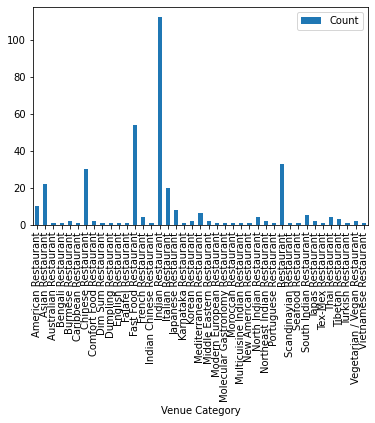

In [91]:
import matplotlib.pyplot as plt
x = delhi_res[["Neighborhood","Venue Category"]].groupby('Venue Category').count()
x.rename(columns= {"Neighborhood" : "Count"}, inplace=True)
x.plot(kind="bar")

Plotting these restaurants on Map

In [92]:
map_delhi_res = folium.Map([28.63, 77.22], zoom_start = 12)

for lat, lng, neighborhood, category in zip(delhi_res["Venue Latitude"], delhi_res["Venue Longitude"], delhi_res["Neighborhood"], delhi_res["Venue Category"]):
  label = "{}, {}".format(category, neighborhood)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius = 2,
      popup = label,
      color='green',
      fill=True,
      fill_color='#3146cc',
      fill_opacity=0.7,
      parse_html=False).add_to(map_delhi_res)

      
map_delhi_res

Unique Venue categories

In [93]:
len(delhi_teh_venues["Venue Category"].unique())

172

### Preparing Data for Clustering

We will create an one hot vector of all the dataframe

In [94]:
delhi_teh_onehot = pd.get_dummies(delhi_teh_venues[['Venue Category']], prefix="", prefix_sep="")

delhi_teh_onehot['Neighborhood'] = delhi_teh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_teh_onehot.columns[-1]] + list(delhi_teh_onehot.columns[:-1])
delhi_teh_onehot = delhi_teh_onehot[fixed_columns]

delhi_teh_onehot.head()

,Wine Bar,ATM,Airport Food Court,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Café,Campground,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,North Indian Restaurant,Northeast Indian Restaurant,Office,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Planetarium,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Recreation Center,Resort,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sports Bar,Stadium,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chanakyapuri New Delhi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chanakyapuri New Delhi,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chanakyapuri New Delhi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chanakyapuri New Delhi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Grouping data by Neighborhood and calculating mean 

In [95]:
delhi_teh_grouped = delhi_teh_onehot.groupby('Neighborhood').mean().reset_index()
delhi_teh_grouped

,Neighborhood,Wine Bar,ATM,Airport Food Court,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Café,Campground,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,New American Restaurant,Nightclub,Nightlife Spot,North Indian Restaurant,Northeast Indian Restaurant,Office,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Planetarium,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Recreation Center,Resort,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sports Bar,Stadium,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Alipur New Delhi,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.25,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0000,0.00,0.0000,0.00,0.000000,0.0000,0.00,0.0000,0.000000,0.000000,0.00,0.000000,0.000000
1,Chanakyapuri New Delhi,0.000000,0.000000,0.000000,0.013333,0.000000,0.0000,0.013333,0.013333,0.00,0.013333,0.00,0.000000,0.000000,0.013333,0.00,0.0000,0.000

Getting columns with word "Restaurant"

In [96]:
rest_cols = [col for col in delhi_teh_grouped.columns if 'Restaurant' in col]
rest_cols

['American Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Bengali Restaurant',
 'Burmese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Comfort Food Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'English Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'French Restaurant',
 'Indian Chinese Restaurant',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Karnataka Restaurant',
 'Korean Restaurant',
 'Mediterranean Restaurant',
 'Middle Eastern Restaurant',
 'Modern European Restaurant',
 'Molecular Gastronomy Restaurant',
 'Moroccan Restaurant',
 'Multicuisine Indian Restaurant',
 'New American Restaurant',
 'North Indian Restaurant',
 'Northeast Indian Restaurant',
 'Portuguese Restaurant',
 'Restaurant',
 'Scandinavian Restaurant',
 'Seafood Restaurant',
 'South Indian Restaurant',
 'Tapas Restaurant',
 'Tex-Mex Restaurant',
 'Thai Restaurant',
 'Tibetan Restaurant',
 'Turkish Restaurant',
 'Vegetarian / Veg

For our analysis, we need non Indian restaurants. So removing restaurants with keyword Indian.

In [97]:
rest_cols.remove("Indian Restaurant")
rest_cols.remove("Restaurant")
rest_cols.remove("Indian Chinese Restaurant")
rest_cols.remove("Karnataka Restaurant")
rest_cols.remove("Multicuisine Indian Restaurant")
rest_cols.remove("North Indian Restaurant")
rest_cols.remove("Northeast Indian Restaurant")
rest_cols.remove("South Indian Restaurant")
rest_cols

['American Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Bengali Restaurant',
 'Burmese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Comfort Food Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'English Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'French Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Mediterranean Restaurant',
 'Middle Eastern Restaurant',
 'Modern European Restaurant',
 'Molecular Gastronomy Restaurant',
 'Moroccan Restaurant',
 'New American Restaurant',
 'Portuguese Restaurant',
 'Scandinavian Restaurant',
 'Seafood Restaurant',
 'Tapas Restaurant',
 'Tex-Mex Restaurant',
 'Thai Restaurant',
 'Tibetan Restaurant',
 'Turkish Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant']

Adding column Text in the beginning

In [98]:
rest_cols = ["Neighborhood"] + rest_cols
rest_cols

['Neighborhood',
 'American Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Bengali Restaurant',
 'Burmese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Comfort Food Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'English Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'French Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Mediterranean Restaurant',
 'Middle Eastern Restaurant',
 'Modern European Restaurant',
 'Molecular Gastronomy Restaurant',
 'Moroccan Restaurant',
 'New American Restaurant',
 'Portuguese Restaurant',
 'Scandinavian Restaurant',
 'Seafood Restaurant',
 'Tapas Restaurant',
 'Tex-Mex Restaurant',
 'Thai Restaurant',
 'Tibetan Restaurant',
 'Turkish Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant']

In [99]:
delhi_teh_rest = delhi_teh_grouped[rest_cols]
delhi_teh_rest

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Scandinavian Restaurant,Seafood Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Alipur New Delhi,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.0000,0.00,0.000000,0.000000
1,Chanakyapuri New Delhi,0.013333,0.013333,0.00,0.0000,0.00,0.00,0.040000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.026667,0.013333,0.013333,0.00,0.026667,0.000000,0.000000,0.00,0.013333,0.00,0.00,0.00,0.013333,0.00,0.00,0.0000,0.0000,0.00,0.000000,0.013333
2,Civil Lines New Delhi,0.000000,0.032258,0.00,0.0000,0.00,0.00,0.096774,0.000000,0.00,0.032258,0.000000,0.00,0.193548,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.0000,0.00,0.000000,0.000000
3,Defence Colony New Delhi,0.000000,0.010526,0.00,0.0000,0.00,0.00,0.031579,0.000000,0.00,0.000000,0.010526,0.00,0.042105,0.010526,0.063158,0.010526,0.00,0.000000,0.000000,0.010526,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.0000,0.00,0.000000,0.000000
4,Delhi Cantonment New Delhi,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.0000,0.00,0.000000,0.000000
5,Dwarka New Delhi,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.263158,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.0000,0.00,0.000000,0.000000
6,Gandhi Nagar New Delhi,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.0000,0.00,0.000000,0.000000
7,Hauz Khas New Delhi,0.010000,0.030000,0.01,0.0000,0.01,0.00,0.020000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.010000,0.01,0.020000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.01,0.000000,0.01,0.00,0.0000,0.0100,0.01,0.000000,0.000000
8,Kalkaji New Delhi,0.000000,0.025000,0.00,0.0125,0.00,0.00,0.025000,0.000000,0.00,0.000000,0.000000,0.00,0.050000,0.012500,0.025000,0.012500,0.00,0.000000,0.012500,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0125,0.0125,0.00,0.000000,0.000000
9,Kanjhawala New Delhi,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.0000,0.00,0.000000,0.000000


Regions with 5 topmost restaurant types

In [100]:
num_top_venues = 5

for hood in delhi_teh_rest['Neighborhood']:
    print("----"+hood+"----")
    temp = delhi_teh_rest[delhi_teh_rest['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alipur New Delhi----
                           venue  freq
0            American Restaurant   0.0
1       Mediterranean Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3             Turkish Restaurant   0.0
4             Tibetan Restaurant   0.0


----Chanakyapuri New Delhi----
                      venue  freq
0        Chinese Restaurant  0.04
1         French Restaurant  0.03
2  Mediterranean Restaurant  0.03
3       American Restaurant  0.01
4        Seafood Restaurant  0.01


----Civil Lines New Delhi----
                  venue  freq
0  Fast Food Restaurant  0.19
1    Chinese Restaurant  0.10
2   Dumpling Restaurant  0.03
3      Asian Restaurant  0.03
4    Seafood Restaurant  0.00


----Defence Colony New Delhi----
                  venue  freq
0    Italian Restaurant  0.06
1  Fast Food Restaurant  0.04
2    Chinese Restaurant  0.03
3    English Restaurant  0.01
4      Asian Restaurant  0.01


----Delhi Cantonment New Delhi----
                           venue  freq
0

Most Common Venues

This will help us to analyse the clusters better in the end

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_teh_rest['Neighborhood']

for ind in np.arange(delhi_teh_rest.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_teh_rest.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alipur New Delhi,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
1,Chanakyapuri New Delhi,Chinese Restaurant,French Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Italian Restaurant,Japanese Restaurant,American Restaurant,Seafood Restaurant
2,Civil Lines New Delhi,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Dumpling Restaurant,Vietnamese Restaurant,Japanese Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant
3,Defence Colony New Delhi,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,French Restaurant,Modern European Restaurant,Japanese Restaurant,English Restaurant,Dumpling Restaurant,Falafel Restaurant
4,Delhi Cantonment New Delhi,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
5,Dwarka New Delhi,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant
6,Gandhi Nagar New Delhi,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
7,Hauz Khas New Delhi,Asian Restaurant,Mediterranean Restaurant,Chinese Restaurant,Korean Restaurant,Australian Restaurant,Burmese Restaurant,Italian Restaurant,Japanese Restaurant,American Restaurant,Turkish Restaurant
8,Kalkaji New Delhi,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Tibetan Restaurant,Thai Restaurant,Bengali Restaurant,French Restaurant,Middle Eastern Restaurant,Japanese Restaurant
9,Kanjhawala New Delhi,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant


### Clustering of Restaurants

Now we will cluster the restaurant based on their types

In [104]:
toclusters = 5

to_clustering = delhi_teh_rest.drop(["Neighborhood"], 1)
kmeans = KMeans(n_clusters=toclusters,max_iter=1000 ,random_state=0).fit(to_clustering)
kmeans.labels_[0:10]

array([0, 0, 3, 2, 0, 3, 0, 0, 2, 0], dtype=int32)

We will add clustering labels to the dataframe

In [105]:
# neighborhoods_venues_sorted.drop(['Cluster Labels'], axis = 1 ,inplace=True)

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = df_teh

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

delhi_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chanakyapuri New Delhi,28.594677,77.188521,0,Chinese Restaurant,French Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Italian Restaurant,Japanese Restaurant,American Restaurant,Seafood Restaurant
1,Rohini New Delhi,28.716209,77.117074,1,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant
2,Patel Nagar New Delhi,28.659809,77.156957,1,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Italian Restaurant,French Restaurant,Falafel Restaurant,English Restaurant,Dumpling Restaurant,Vietnamese Restaurant,Japanese Restaurant
3,Dwarka New Delhi,28.574272,77.065332,3,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant
4,Saket New Delhi,28.524411,77.213725,2,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,American Restaurant,Thai Restaurant,Tex-Mex Restaurant,Burmese Restaurant,Italian Restaurant,Comfort Food Restaurant,Falafel Restaurant


Visualising these clusters on a Map

In [106]:
map_clusters = folium.Map([28.63, 77.22], zoom_start=11)

# set color scheme for the clusters
x = np.arange(toclusters)
ys = [i+x+(i*x)**2 for i in range(toclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Observation

Analysis of the obtained labels

Label 0

Vietnamese, French and Japanese restaurants

In [107]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 0]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chanakyapuri New Delhi,28.594677,77.188521,0,Chinese Restaurant,French Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Italian Restaurant,Japanese Restaurant,American Restaurant,Seafood Restaurant
6,Kotwali New Delhi,28.641926,77.221750,0,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Korean Restaurant,Mediterranean Restaurant,Molecular Gastronomy Restaurant,Portuguese Restaurant,Tibetan Restaurant,Italian Restaurant,Caribbean Restaurant
7,Seelampur New Delhi,28.669816,77.266814,0,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
9,Gandhi Nagar New Delhi,28.660000,77.262600,0,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
10,Delhi Cantonment New Delhi,28.593833,77.134979,0,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
11,Narela New Delhi,28.842610,77.091835,0,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
12,Kanjhawala New Delhi,28.735817,77.004315,0,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
14,Najafgarh New Delhi,28.612304,76.982391,0,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
15,Hauz Khas New Delhi,28.544256,77.206707,0,Asian Restaurant,Mediterranean Restaurant,Chinese Restaurant,Korean Restaurant,Australian Restaurant,Burmese Restaurant,Italian Restaurant,Japanese Restaurant,American Restaurant,Turkish Restaurant
18,Yamuna Vihar New Delhi,28.700372,77.272773,0,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant


Label 1

Fast Food Restaurants

In [108]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Rohini New Delhi,28.716209,77.117074,1,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant
2,Patel Nagar New Delhi,28.659809,77.156957,1,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Italian Restaurant,French Restaurant,Falafel Restaurant,English Restaurant,Dumpling Restaurant,Vietnamese Restaurant,Japanese Restaurant
8,Shahdara New Delhi,28.673333,77.289025,1,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant
13,Punjabi Bagh New Delhi,28.668945,77.132461,1,Fast Food Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Japanese Restaurant
20,Preet Vihar New Delhi,28.641441,77.295259,1,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Comfort Food Restaurant
24,Rajouri Garden New Delhi,28.642152,77.116060,1,Fast Food Restaurant,American Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant
28,Karol Bagh New Delhi,28.652998,77.189023,1,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant


Label 2

Chinese, Thai and American Restaurants

In [109]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 2]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Saket New Delhi,28.524411,77.213725,2,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,American Restaurant,Thai Restaurant,Tex-Mex Restaurant,Burmese Restaurant,Italian Restaurant,Comfort Food Restaurant,Falafel Restaurant
5,Defence Colony New Delhi,28.571222,77.231776,2,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,French Restaurant,Modern European Restaurant,Japanese Restaurant,English Restaurant,Dumpling Restaurant,Falafel Restaurant
16,Kalkaji New Delhi,28.540000,77.259200,2,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Tibetan Restaurant,Thai Restaurant,Bengali Restaurant,French Restaurant,Middle Eastern Restaurant,Japanese Restaurant
21,Vasant Vihar New Delhi,28.560691,77.160791,2,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Burmese Restaurant,Dim Sum Restaurant
23,Saraswati Vihar New Delhi,28.477224,77.083276,2,Chinese Restaurant,American Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,Dim Sum Restaurant,New American Restaurant,Japanese Restaurant,Caribbean Restaurant,Tapas Restaurant


Label 3

Asian and Fast Food Restaurants

In [110]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 3]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Dwarka New Delhi,28.574272,77.065332,3,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant
17,Civil Lines New Delhi,28.676851,77.225030,3,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Dumpling Restaurant,Vietnamese Restaurant,Japanese Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Caribbean Restaurant


Label 4

Italian Restaurants

In [111]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 4]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Mehrauli New Delhi,28.521826,77.178323,4,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Dim Sum Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant,Dumpling Restaurant,Vietnamese Restaurant


### Conclusion



*   Our K means algorithm divided the area into 5 clusters as follows
    

    1.   Vietnamese, French and Japanese restaurants
    2.   Fast Food Restaurants
    3.   Chinese, Thai and American Restaurants
    4.   Asian and Fast Food Restaurants
    5.   Italian Restaurants

*   Region names can be seen from the above tables


*   Based on these clusters, decisions can be made by an entrepreneur who wishes to open a new restaurant. He/she can look to open a restaurant where the competition is low but the food type is popular. However, if the food quality is authentic and affordable, the restaurant will work.


*   Example : If someone wants to open a new Fast food restaurant, he can see that most of the fast food restaurants are in the cluster 1. So, the competition is high in these areas. Also, cluster 4 and 2 have less fast food restaurants. So, a new restaurant can be opened in these areas.



### Limitations and Suggestions for Future Research:



*   Foursquare data is limited in India. Other apis, like zomato would give better results in India.
*   There are many other factors that can influence the decision of opening a new restaurant. 
1. population density, 
2. income of residents, 
3. rent that could influence the decision to open a new restaurant.
However, to put all these data into this project is not possible to do within a short time frame for this capstone project. 
